# IMPORT PACKAGES

In [1]:
# !pip install emoji

In [2]:
# standard
import numpy as np
import pandas as pd
import json

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# text analysis
import re
import emoji

# A) DATA PREPARATION

>### Import Data
source of data:
1. https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia
2. https://github.com/indobenchmark/indonlu/tree/master/dataset/smsa_doc-sentiment-prosa

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
df_election = pd.read_csv("Data/dataset_2014_presidential_election.csv", encoding='iso-8859-1')
df_ecommerce = pd.read_csv('Data/dataset_ecommerce_review.csv', sep=',', names=['review', 'sentiment', 'nan1', 'nan2', 'nan3'])
df_ig_comment = pd.read_csv("Data/dataset_komentar_instagram_cyberbullying.csv", encoding='utf-8')
df_tv_review = pd.read_csv("Data/dataset_tweet_sentimen_tayangan_tv.csv", encoding='utf-8')
df_cell_provider_review = pd.read_csv('Data/dataset_tweet_sentiment_cellular_service_provider.csv', encoding='utf-8')
df_movie_review = pd.read_csv("Data/dataset_tweet_sentiment_opini_film.csv", encoding='utf-8')
df_dki_election = pd.read_csv("Data/dataset_tweet_sentiment_pilkada_DKI_2017.csv", encoding='utf-8')
df_emoji = pd.read_csv("Data/dataset_master_emoji.csv", encoding='utf-8')
df_positive_negative_words_1 = pd.read_csv("Data/dataset_positive_negative_words_1.csv", encoding='utf-8')
df_positive_negative_words_2 = pd.read_csv("Data/dataset_positive_negative_words_2.csv", encoding='utf-8')
df_indonlu_train = pd.read_csv("Data/dataset_indonlu_train_preprocess.tsv", sep='\t', names=['text', 'sentiment'])
df_indonlu_valid = pd.read_csv("Data/dataset_indonlu_valid_preprocess.tsv", sep='\t', names=['text', 'sentiment'])
# df_ind_twitter_sentiment = pd.read_csv("Data/dataset_Indonesian_Sentiment_Twitter_Dataset_Labeled.csv", sep="\t")


# directory = '/content/drive/My Drive/Colab Notebooks/COURSE - PURWADHIKA - Data Science & Machine Learning/Modul_4_Final_Project/Data/'
# df_election = pd.read_csv(directory + "dataset_2014_presidential_election.csv", encoding='iso-8859-1')
# df_ecommerce = pd.read_csv(directory + 'dataset_ecommerce_review.csv', sep=',', names=['review', 'sentiment', 'nan1', 'nan2', 'nan3'])
# df_ig_comment = pd.read_csv(directory + "dataset_komentar_instagram_cyberbullying.csv", encoding='utf-8')
# df_tv_review = pd.read_csv(directory + "dataset_tweet_sentimen_tayangan_tv.csv", encoding='utf-8')
# df_cell_provider_review = pd.read_csv(directory + 'dataset_tweet_sentiment_cellular_service_provider.csv', encoding='utf-8')
# df_movie_review = pd.read_csv(directory + "dataset_tweet_sentiment_opini_film.csv", encoding='utf-8')
# df_dki_election = pd.read_csv(directory + "dataset_tweet_sentiment_pilkada_DKI_2017.csv", encoding='utf-8')
# df_emoji = pd.read_csv(directory + "dataset_master_emoji.csv", encoding='utf-8')
# df_positive_negative_words_1 = pd.read_csv(directory + "data_positive_negative_words_1.csv", encoding='utf-8')
# df_positive_negative_words_2 = pd.read_csv(directory + "data_positive_negative_words_2.csv", encoding='utf-8')
# df_indonlu_train = pd.read_csv(directory + "dataset_indonlu_train_preprocess.tsv", sep='\t', names=['text', 'sentiment'])
# df_indonlu_valid = pd.read_csv(directory + "dataset_indonlu_valid_preprocess.tsv", sep='\t', names=['text', 'sentiment'])


>#### Data Sample of Each Dataset

In [17]:
# df_election
print('df_election')
display(df_election.head())

print('\ndf_ecommerce')
display(df_ecommerce.head())

print('\ndf_ig_comment')
display(df_ig_comment.head())

print('\ndf_tv_review')
display(df_tv_review.head())

print('\ndf_cell_provider_review')
display(df_cell_provider_review.head())

print('\ndf_movie_review')
display(df_movie_review.head())

print('\ndf_dki_election')
display(df_dki_election.head())

print('\ndf_emoji')
display(df_emoji.head())

print('\ndf_positive_negative_words_1')
display(df_positive_negative_words_1.head())

print('\ndf_positive_negative_words_2')
display(df_positive_negative_words_2.head())

print('\ndf_indonlu_train')
display(df_indonlu_train.head())

print('\ndf_indonlu_valid')
display(df_indonlu_valid.head())

# print('\ndf_ind_twitter_sentiment')
# display(df_ind_twitter_sentiment.sample(5))

df_election


,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,Jokowi,web,BLITAR - INDONESIA,1
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,Jokowi,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,Jokowi,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,Prabowo,web,Manado,1
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,Prabowo,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1



df_ecommerce


,review,sentiment,nan1,nan2,nan3
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1,NaN,NaN,NaN
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1,NaN,NaN,NaN
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1,NaN,NaN,NaN
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1,NaN,NaN,NaN
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1,NaN,NaN,NaN



df_ig_comment


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."



df_tv_review


,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7



df_cell_provider_review


,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>



df_movie_review


,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."



df_dki_election


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...



df_emoji


,ID,Emoji,Sentiment,Makna Emoji,Special Tag
0,1,😛,negative,Face With Stuck-Out Tongue,<FACE WITH STUCK-OUT TOUNGES>
1,2,😠,negative,Angry Face,<Angry Face>
2,3,💣,negative,Bomb,<Bomb>
3,4,💔,negative,Broken Heart,<Broken Heart>
4,5,😕,negative,Confused Face,<Confused Face>



df_positive_negative_words_1


,xx,xx.1,Isi_Tweet,xx.2,xx.3,xx xx,Source,Topic,Sentimen,xx.4
0,NaN,NaN,inkonsisten,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
1,NaN,NaN,porno,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
2,NaN,NaN,teroris,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
3,NaN,NaN,sesat,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
4,NaN,NaN,tuntut,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN



df_positive_negative_words_2


,term,Sentimen
0,diakui,positif
1,penghargaan,positif
2,kecerdasan,positif
3,kekaguman,positif
4,mengagumi,positif



df_indonlu_train


,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative



df_indonlu_valid


,text,sentiment
0,"meski masa kampanye sudah selesai , bukan bera...",neutral
1,tidak enak,negative
2,restoran ini menawarkan makanan sunda . kami m...,positive
3,lokasi di alun alun masakan padang ini cukup t...,positive
4,betapa bejad kader gerindra yang anggota dprd ...,negative


In [18]:
# df_ind_twitter_sentiment.sample(10)

>#### Sentiment Distribution Plot of Each Dataset

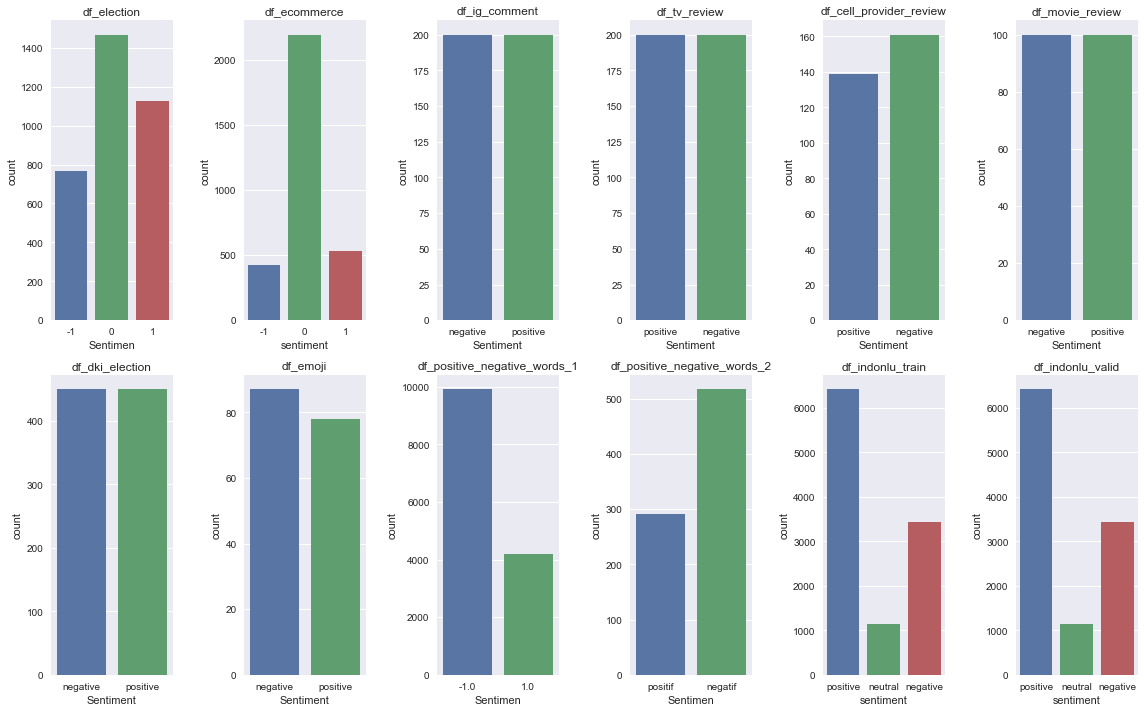

In [19]:
# 251 -> 2 rows, 5 columns, index n

plt.style.use('seaborn')
plt.figure(figsize=(16,10))
ax = plt.axes()

plt.subplot(261)
sns.countplot(x=df_election.Sentimen)
plt.title('df_election')

plt.subplot(262)
sns.countplot(x=df_ecommerce.sentiment)
plt.title('df_ecommerce')

plt.subplot(263)
sns.countplot(x=df_ig_comment.Sentiment)
plt.title('df_ig_comment')

plt.subplot(264)
sns.countplot(x=df_tv_review.Sentiment)
plt.title('df_tv_review')

plt.subplot(265)
sns.countplot(x=df_cell_provider_review.Sentiment)
plt.title('df_cell_provider_review')

plt.subplot(266)
sns.countplot(x=df_movie_review.Sentiment)
plt.title('df_movie_review')

plt.subplot(267)
sns.countplot(x=df_dki_election.Sentiment)
plt.title('df_dki_election')

plt.subplot(268)
sns.countplot(x=df_emoji.Sentiment)
plt.title('df_emoji')

plt.subplot(269)
sns.countplot(x=df_positive_negative_words_1.Sentimen)
plt.title('df_positive_negative_words_1')

plt.subplot(2,6,10)
sns.countplot(x=df_positive_negative_words_2.Sentimen)
plt.title('df_positive_negative_words_2')

plt.subplot(2,6,11)
sns.countplot(x=df_indonlu_train.sentiment)
plt.title('df_indonlu_train')

plt.subplot(2,6,12)
sns.countplot(x=df_indonlu_train.sentiment)
plt.title('df_indonlu_valid')

plt.tight_layout()
plt.show()

# B) Data Format Preparation

>#### Dataframe Modification
- drop unused features
- convert Sentiment Label in text into nominal category (1, 0, -1)
- shifting the column position 

In [20]:
df_election_m = df_election.drop(columns = ['ID', 'Tweet_ID', 'Tanggal_Tweet', 'Kandidat', 'Aplikasi', 'Lokasi User'])
df_ecommerce_m = df_ecommerce.drop(columns = ['nan1', 'nan2', 'nan3'])


# categorical label encoding & feature position shift
sentiment_label_conversion_Sentiment = {"Sentiment": {'positive': 1, 'neutral': 0, 'negative': -1}}
sentiment_label_conversion_sentiment = {"sentiment": {'positive': 1, 'neutral': 0, 'negative': -1}}
sentiment_label_conversion_Sentimen = {"Sentimen": {'positif': 1, 'netral': 0, 'negatif': -1}}
sentiment_label_conversion_float_to_integer = {"Sentimen": {1.0: 1, 0.0: 0, -1.0: -1}}


df_ig_comment_m = df_ig_comment.drop(columns='Id') # drop unused columns
df_ig_comment_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_ig_comment_m = df_ig_comment_m.reindex(columns=['Instagram Comment Text', 'Sentiment']) # reorder the columns

df_tv_review_m = df_tv_review.drop(columns=['Id', 'Acara TV', 'Jumlah Retweet']) # drop unused columns
df_tv_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_tv_review_m = df_tv_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_cell_provider_review_m = df_cell_provider_review.drop(columns='Id') # drop unused columns
df_cell_provider_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_cell_provider_review_m = df_cell_provider_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_movie_review_m = df_movie_review.drop(columns='Id') # drop unused columns
df_movie_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_movie_review_m = df_movie_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_dki_election_m = df_dki_election.drop(columns=['Id', 'Pasangan Calon']) # drop unused columns
df_dki_election_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_dki_election_m = df_dki_election_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_emoji_m = df_emoji.drop(columns=['ID', 'Emoji', 'Special Tag']) # drop unused columns
df_emoji_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_emoji_m = df_emoji_m.reindex(columns=['Makna Emoji', 'Sentiment']) # reorder the columns

df_positive_negative_words_1_m = df_positive_negative_words_1.drop(columns=['xx', 'xx.1', 'xx.2', 'xx.3', 'xx xx', 'Source', 'Topic', 'xx.4']) # drop unused columns
df_positive_negative_words_1_m.replace(sentiment_label_conversion_float_to_integer) # convert categorical sentiment label to numeric label
df_positive_negative_words_1_m['Sentimen'] = df_positive_negative_words_1_m['Sentimen'].fillna(0.0).astype(int)

df_positive_negative_words_2_m = df_positive_negative_words_2.replace(sentiment_label_conversion_Sentimen) # convert categorical sentiment label to numeric label
# df_positive_negative_words_1.Sentimen.isna().value_counts()

df_indonlu_train_m = df_indonlu_train.copy()
df_indonlu_train_m.replace(sentiment_label_conversion_sentiment, inplace=True) # convert categorical sentiment label to numeric label

df_indonlu_valid_m = df_indonlu_valid.copy()
df_indonlu_valid_m.replace(sentiment_label_conversion_sentiment, inplace=True) # convert categorical sentiment label to numeric label


In [21]:
# df_election
print('df_election')
display(df_election.head())
display(df_election_m.head())

print('\ndf_ecommerce')
display(df_ecommerce.head())
display(df_ecommerce_m.head())

print('\ndf_ig_comment')
display(df_ig_comment.head())
display(df_ig_comment_m.head())

print('\ndf_tv_review')
display(df_tv_review.head())
display(df_tv_review_m.head())

print('\ndf_cell_provider_review')
display(df_cell_provider_review.head())
display(df_cell_provider_review_m.head())

print('\ndf_movie_review')
display(df_movie_review.head())
display(df_movie_review_m.head())

print('\ndf_dki_election')
display(df_dki_election.head())
display(df_dki_election_m.head())

print('\ndf_emoji')
display(df_emoji.head())
display(df_emoji_m.head())

print('\ndf_positive_negative_words_1')
display(df_positive_negative_words_1.head())
display(df_positive_negative_words_1_m.head())

print('\ndf_positive_negative_words_2')
display(df_positive_negative_words_2.head())
display(df_positive_negative_words_2_m.head())

df_election


,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,Jokowi,web,BLITAR - INDONESIA,1
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,Jokowi,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,Jokowi,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,Prabowo,web,Manado,1
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,Prabowo,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1


,Isi_Tweet,Sentimen
0,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,1
1,"capres jokowi,wacapres abraham samad. gubernur...",1
2,"RT @RintisBautista: capres jokowi,wacapres abr...",1
3,capres ( Prabowo ) and cawapres ( jokowi ) and...,1
4,RT @Franliiiii: capres ( Prabowo ) and cawapre...,1



df_ecommerce


,review,sentiment,nan1,nan2,nan3
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1,NaN,NaN,NaN
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1,NaN,NaN,NaN
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1,NaN,NaN,NaN
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1,NaN,NaN,NaN
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1,NaN,NaN,NaN


,review,sentiment
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1



df_ig_comment


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


,Instagram Comment Text,Sentiment
0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,-1
1,Geblek lo tata...cowo bgt dibela2in balikan......,-1
2,Kmrn termewek2 skr lengket lg duhhh kok labil ...,-1
3,"Intinya kalau kesel dengan ATT nya, gausah ke ...",-1
4,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",-1



df_tv_review


,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


,Text Tweet,Sentiment
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",1
1,Selamat berbuka puasa Semoga amal ibadah hari ...,1
2,"Ada nih di trans7 hitam putih, dia dpt penghar...",1
3,selamat ya mas @adietaufan masuk hitamputih,1
4,Asiknya nonton Hitam Putih Trans7,1



df_cell_provider_review


,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


,Text Tweet,Sentiment
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,1
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",1
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,-1
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,-1
4,Selamat malam PENDUSTA <PROVIDER_NAME>,-1



df_movie_review


,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


,Text Tweet,Sentiment
0,Jelek filmnya... apalagi si ernest gak mutu bg...,-1
1,Film king Arthur ini film paling jelek dari se...,-1
2,@beexkuanlin Sepanjang film gwa berkata kasar ...,-1
3,Ane ga suka fast and furious..menurutku kok je...,-1
4,"@baekhyun36 kan gua ga tau film nya, lu bilang...",-1



df_dki_election


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


,Text Tweet,Sentiment
0,Banyak akun kloning seolah2 pendukung #agussil...,-1
1,#agussilvy bicara apa kasihan yaa...lap itu ai...,-1
2,Kalau aku sih gak nunggu hasil akhir QC tp lag...,-1
3,Kasian oh kasian dengan peluru 1milyar untuk t...,-1
4,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,-1



df_emoji


,ID,Emoji,Sentiment,Makna Emoji,Special Tag
0,1,😛,negative,Face With Stuck-Out Tongue,<FACE WITH STUCK-OUT TOUNGES>
1,2,😠,negative,Angry Face,<Angry Face>
2,3,💣,negative,Bomb,<Bomb>
3,4,💔,negative,Broken Heart,<Broken Heart>
4,5,😕,negative,Confused Face,<Confused Face>


,Makna Emoji,Sentiment
0,Face With Stuck-Out Tongue,-1
1,Angry Face,-1
2,Bomb,-1
3,Broken Heart,-1
4,Confused Face,-1



df_positive_negative_words_1


,xx,xx.1,Isi_Tweet,xx.2,xx.3,xx xx,Source,Topic,Sentimen,xx.4
0,NaN,NaN,inkonsisten,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
1,NaN,NaN,porno,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
2,NaN,NaN,teroris,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
3,NaN,NaN,sesat,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
4,NaN,NaN,tuntut,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN


,Isi_Tweet,Sentimen
0,inkonsisten,-1
1,porno,-1
2,teroris,-1
3,sesat,-1
4,tuntut,-1



df_positive_negative_words_2


,term,Sentimen
0,diakui,positif
1,penghargaan,positif
2,kecerdasan,positif
3,kekaguman,positif
4,mengagumi,positif


,term,Sentimen
0,diakui,1
1,penghargaan,1
2,kecerdasan,1
3,kekaguman,1
4,mengagumi,1


>#### Combining All Dataframe

In [22]:
# LIST OF MODIFIED DFs before column name change
# df_election_m.head()
# df_ecommerce_m.head()
# df_ig_comment_m.head()
# df_tv_review_m.head()
# df_cell_provider_review_m.head()
# df_movie_review_m.head()
# df_dki_election_m.head()
# df_emoji_m.head()
# df_positive_negative_words_1_m.head()
# df_positive_negative_words_2_m.head()

dataframes = [df_election_m, df_ecommerce_m, df_ig_comment_m, df_tv_review_m, df_cell_provider_review_m, df_movie_review_m, df_dki_election_m, df_emoji_m, df_positive_negative_words_1_m, df_positive_negative_words_2_m]
for i in dataframes:
  print(i.columns)

Index(['Isi_Tweet', 'Sentimen'], dtype='object')
Index(['review', 'sentiment'], dtype='object')
Index(['Instagram Comment Text', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Makna Emoji', 'Sentiment'], dtype='object')
Index(['Isi_Tweet', 'Sentimen'], dtype='object')
Index(['term', 'Sentimen'], dtype='object')


In [23]:
# change the column names
dataframes = [df_indonlu_train_m, df_indonlu_valid_m, df_election_m, df_ecommerce_m, df_ig_comment_m, df_tv_review_m, df_cell_provider_review_m, df_movie_review_m, df_dki_election_m, df_emoji_m, df_positive_negative_words_1_m, df_positive_negative_words_2_m]
# len(dataframes)
for i in dataframes:
  i.columns = ['text', 'sentiment']

In [24]:
# LIST OF MODIFIED DFs after column name change
for i in dataframes:
  print(i.columns)

Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')


In [25]:
df = pd.concat(dataframes, ignore_index=True)

In [26]:
print(len(df))
df.sample(10)

36034


,text,sentiment
32810,bebas banjir,1
8871,suku lo apa sih ? bisa apa sih lo ?,-1
12733,"RT @panji_singgih: Calon Presiden Surya Paloh,...",0
28176,terboros,-1
11209,"makanan enak , tempat nyaman . direkomendasika...",1
17017,"topik hangat: “sadis, @mataharimallcom ramaika...",0
18530,terima kasih @mataharimallcom seminar hari ini...,1
23896,penabokan,-1
25280,bersikut-sikutan,-1
23184,membombardir,-1


In [27]:
df.sentiment.value_counts().iloc[:]

-1    16638
 1    14454
 0     4942
Name: sentiment, dtype: int64

# C) Final Dataset

>#### Sentiment Distribution

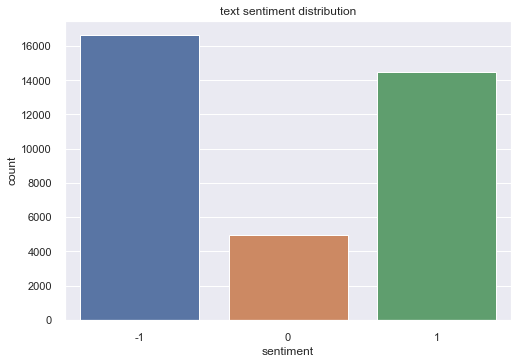

,sentiment,percentage
-1,16638,46.17
1,14454,40.11
0,4942,13.71


In [28]:
sns.set(style='darkgrid')
sns.countplot(x=df.sentiment)
plt.title('text sentiment distribution')
plt.show()

sentiment_distribution = pd.DataFrame(df.sentiment.value_counts())
sentiment_distribution['percentage'] = list(round(df.sentiment.value_counts(normalize=True) * 100, 2))
sentiment_distribution

>#### Final Data

In [15]:
df

,contents,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0
2,lokasi strategis di jalan sumatera bandung . t...,1
3,betapa bahagia nya diri ini saat unboxing pake...,1
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1
...,...,...
36029,duka,-1
36030,pencemas,-1
36031,luka,-1
36032,melukai,-1


In [17]:
# df.to_csv('Data/final_text_data.csv', index=False)

In [29]:
# display(df_ind_twitter_sentiment.sample(10))
# len(df_ind_twitter_sentiment)

In [62]:
# Steeming Bahasa Indonesia - Python SastrawiPython
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [55]:
x = df.head()

In [59]:
for i in x.contents:
    print(i, '\n')

warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal ! 

mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah 

lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak . 

betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi ! 

duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar ma

In [63]:
def stem(text):
    stemmed_text = stemmer.stem(text)
    return stemmed_text

In [64]:
x['stemmed_word'] = x.contents.apply(lambda x: stem(x))

C:\Users\Damianus Deni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,contents,sentiment,stemmed_word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1,warung ini milik oleh usaha pabrik tahu yang s...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,1,lokasi strategis di jalan sumatera bandung tem...
3,betapa bahagia nya diri ini saat unboxing pake...,1,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1,duh jadi mahasiswa jangan sombong dong kasih k...


In [65]:
pd.options.display.max_colwidth = None
x

,contents,sentiment,stemmed_word
0,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",1,warung ini milik oleh usaha pabrik tahu yang sudah puluh tahun kenal buat tahu putih di bandung tahu kualitas padu ahli masak padu kretivitas jadi warung yang saji menu utama bahan tahu tambah menu umum lain seperti ayam semua selera indonesia harga cukup jangkau jangan lewat tahu bletoka nya tidak kalah dengan yang asli dari tegal
1,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,0,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah
2,"lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .",1,lokasi strategis di jalan sumatera bandung tempat nya nyaman utama sofa di lantai 2 paella nya enak sangat pas makan dengan minum bir dingin appetiser nya juga enak
3,betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !,1,betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus tetap beli lagi
4,"duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa .",-1,duh jadi mahasiswa jangan sombong dong kasih kartu kuning segala ajar dulu yang baik tidak usah ikut politik nanti sudah selesai kuliah nya mau ikut politik juga tidak telat dasar mahasiswa


>#### Text Analysis

In [17]:
# count_words = df.text.apply(lambda x: len(x.split(' '))).sum()
# count_mentions = df.text.apply(lambda x: x.count('@')).sum()
# count_hashtags = df.text.apply(lambda x: x.count('#')).sum()
# count_urls = df.text.apply(lambda x: x.count('http') + x.count('bit.ly')).sum()
# count_excl_quest = df.text.apply(lambda x: x.count('!') + x.count('?')).sum()
# count_emojis = df.text.apply(lambda x: len(emojis(x))).sum()

In [18]:
# print(f"""total words: {count_words}
#       mentions: {count_mentions}
#       hashtags: {count_hashtags}
#       urls: {count_urls}
#       exlamation & question marks: {count_excl_quest}
#       emojis""")

In [19]:
# all_text = '||'.join(df.text)
# chars = list(all_text)

In [20]:
# emojis = []
# for n, i in enumerate(chars):
#   if i in emoji.UNICODE_EMOJI:
#     emojis.append([n,i])

# emojis

In [21]:
# def emojis(text):
#   emoji_list = []
#   for i in text:
#     if i in emoji.UNICODE_EMOJI:
#       emojis.append(i)
#   return emoji_list

# x = count_emojis(df.text[670400])
# len(x)

In [22]:
# df.text[670400]

In [193]:
from string import punctuation

In [194]:
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

# Slang Dictionary

In [21]:
import json

In [34]:
with open("Data/data_slang_words_dictionary.txt", 'rb') as handle:
    slang_data = json.load(handle)

In [131]:
def slang_converter(x):
    x_split = x.split(" ")
    for i in x_split:
        if i in list(slang_data.keys()):
            x_split[x_split.index(i)] = slang_data[i]
        else:
            pass
    x_split_converted = " ".join(x_split)
    return x_split_converted

In [185]:
def emoji_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(emoji_data.keys()):
            text_split[text_split.index(i)] = emoji_data[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

In [187]:
x = ['betapa @ 🌛 bahagia nya diri ini saat unboxing pake, afaik ', 'duh 🌞 jadi mahasiswa akkoh jangan sombong dong ahaha kasih', "arung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak" , "dipadu kretivitas 💘, jadilah warung yang menyajikan menu utama berbahan tahu" , "ditambah menu 👨 umum lain seperti ayam . semuanya selera indonesia . "]
x = pd.DataFrame(x)
x

,0
0,betapa @ 🌛 bahagia nya diri ini saat unboxing ...
1,duh 🌞 jadi mahasiswa akkoh jangan sombong dong...
2,arung ini dimiliki oleh pengusaha pabrik tahu ...
3,"dipadu kretivitas 💘, jadilah warung yang menya..."
4,ditambah menu 👨 umum lain seperti ayam . semua...


In [188]:
x['slang_cleaned'] = x[0].apply(lambda x: slang_converter(x))
x['emoji_cleaned'] = x[0].apply(lambda x: emoji_converter(x))

x

,0,slang_cleaned,emoji_cleaned
0,betapa @ 🌛 bahagia nya diri ini saat unboxing ...,betapa di 🌛 bahagia nya diri ini saat unboxing...,betapa @ First Quarter Moon With Face bahagia ...
1,duh 🌞 jadi mahasiswa akkoh jangan sombong dong...,aduh 🌞 jadi mahasiswa aku jangan sombong dong ...,duh Sun With Face jadi mahasiswa akkoh jangan ...
2,arung ini dimiliki oleh pengusaha pabrik tahu ...,arung ini dimiliki oleh pengusaha pabrik tahu ...,arung ini dimiliki oleh pengusaha pabrik tahu ...
3,"dipadu kretivitas 💘, jadilah warung yang menya...","dipadu kretivitas 💘, jadilah warung yang menya...","dipadu kretivitas 💘, jadilah warung yang menya..."
4,ditambah menu 👨 umum lain seperti ayam . semua...,ditambah menu 👨 umum lain seperti ayam . semua...,ditambah menu 👨 umum lain seperti ayam . semua...


In [57]:
list_kata = ['ga', 'yng', 'gak', 'kn']

In [58]:
for i in list_kata:
    if i in list(slang_data.keys()):
        print(f'{i} exists')
    else:
        print(i)

ga
yng
gak
kn exists


In [138]:
# stemmed_data = pd.read_csv('Data/text_data_preprocessed_20210402.csv')
# stemmed_data.head()

# Emoji Handling

In [163]:
# df_emoji[df_emoji["Makna Emoji"] == "Man Student"]
df_emoji[130:132]

,ID,Emoji,Sentiment,Makna Emoji,Special Tag
130,131,👨‍🎓,positive,Man Student,<Man Student>
131,132,👩‍🎓,positive,Woman Student,<Woman Student>


In [155]:
emoji_dict = df_emoji[['Emoji', 'Makna Emoji']]
emoji_dict.set_index('Emoji', inplace=True, drop=True)
emoji_dict = emoji_dict.to_dict()

In [157]:
len(emoji_dict['Makna Emoji'])

165

In [158]:
emoji_dict['Makna Emoji']

{'😛': 'Face With Stuck-Out Tongue',
 '😠': 'Angry Face',
 '💣': 'Bomb',
 '💔': 'Broken Heart',
 '😕': 'Confused Face',
 '😞': 'Disappointed Face',
 '😑': 'Expressionless Face',
 '😋': 'Face Savouring Delicious Food',
 '😱': 'Face Screaming in Fear',
 '😓': 'Face With Cold Sweat',
 '😮': 'Face With Open Mouth',
 '😤': 'Face With Steam From Nose',
 '😝': 'Face With Stuck-Out Tongue & Closed Eyes',
 '😶': 'Face Without Mouth',
 '🔥': 'Fire',
 '☹': 'Frowning Face',
 '😬': 'Grimacing Face',
 '⚡': 'High Voltage',
 '🤥': 'Lying Face',
 '😣': 'Persevering Face',
 '🙇': 'Person Bowing',
 '🏃': 'Person Running',
 '🐽': 'Pig Nose',
 '😡': 'Pouting Face',
 '🙈': 'See-No-Evil Monkey',
 '🙁': 'Slightly Frowning Face',
 '🙊': 'Speak-No-Evil Monkey',
 '🤔': 'Thinking Face',
 '👎': 'Thumbs Down',
 '👅': 'Tongue',
 '😩': 'Weary Face',
 '🤐': 'Zipper-Mouth Face',
 '😐': 'Neutral Face',
 '🙄': 'Face With Rolling Eyes',
 '😏': 'Smirking Face',
 '😥': 'Disappointed but Relieved Face',
 '😯': 'Hushed Face',
 '😪': 'Sleepy Face',
 '😫': 'Tired 

In [164]:
emoji_data = {'😛': 'Face With Stuck-Out Tongue',
 '😠': 'Angry Face',
 '💣': 'Bomb',
 '💔': 'Broken Heart',
 '😕': 'Confused Face',
 '😞': 'Disappointed Face',
 '😑': 'Expressionless Face',
 '😋': 'Face Savouring Delicious Food',
 '😱': 'Face Screaming in Fear',
 '😓': 'Face With Cold Sweat',
 '😮': 'Face With Open Mouth',
 '😤': 'Face With Steam From Nose',
 '😝': 'Face With Stuck-Out Tongue & Closed Eyes',
 '😶': 'Face Without Mouth',
 '🔥': 'Fire',
 '☹': 'Frowning Face',
 '😬': 'Grimacing Face',
 '⚡': 'High Voltage',
 '🤥': 'Lying Face',
 '😣': 'Persevering Face',
 '🙇': 'Person Bowing',
 '🏃': 'Person Running',
 '🐽': 'Pig Nose',
 '😡': 'Pouting Face',
 '🙈': 'See-No-Evil Monkey',
 '🙁': 'Slightly Frowning Face',
 '🙊': 'Speak-No-Evil Monkey',
 '🤔': 'Thinking Face',
 '👎': 'Thumbs Down',
 '👅': 'Tongue',
 '😩': 'Weary Face',
 '🤐': 'Zipper-Mouth Face',
 '😐': 'Neutral Face',
 '🙄': 'Face With Rolling Eyes',
 '😏': 'Smirking Face',
 '😥': 'Disappointed but Relieved Face',
 '😯': 'Hushed Face',
 '😪': 'Sleepy Face',
 '😫': 'Tired Face',
 '😴': 'Sleeping Face',
 '😌': 'Relieved Face',
 '😜': 'Face With Stuck-Out Tongue & Winking EyeNegatif',
 '🤤': 'Drooling Face',
 '😒': 'Unamused Face',
 '😔': 'Pensive Face',
 '🙃': 'Upside-Down Face',
 '🤑': 'Money-Mouth Face',
 '😲': 'Astonished Face',
 '😖': 'Confounded Face',
 '😟': 'Worried Face',
 '😢': 'Crying Face',
 '😭': 'Loudly Crying Face',
 '😦': 'Frowning Face With Open Mouth',
 '😧': 'Anguished Face',
 '😨': 'Fearful Face',
 '😰': 'Face With Open Mouth & Cold Sweat',
 '😳': 'Flushed Face',
 '😵': 'Dizzy Face',
 '😷': 'Face With Medical Mask',
 '🤒': 'Face With Thermometer',
 '🤕': 'Face With Head-Bandage',
 '🤢': 'Nauseated Face',
 '🤧': 'Sneezing Face',
 '🤓': 'Nerd Face',
 '😈': 'Smiling Face With Horns',
 '👿': 'Angry Face With Horns',
 '👹': 'Ogre',
 '👺': 'Goblin',
 '💀': 'Skull',
 '☠': 'Skull and Crossbones',
 '👻': 'Ghost',
 '💩': 'Pile of Poo',
 '🙀': 'Weary Cat Face',
 '😿': 'Crying Cat Face',
 '😾': 'Pouting Cat Face',
 '🙉': 'Hear-No-Evil Monkey',
 '🙎': 'Person Pouting',
 '🙅': 'Person Gesturing No',
 '💁': 'Person Tipping Hand',
 '🤦': 'Person Facepalming',
 '🤷': 'Person Shrugging',
 '🤞': 'Crossed Fingers',
 '📉': 'Chart Decreasing',
 '⛔': 'No Entry',
 '✖': 'Heavy Multiplication X',
 '❌': 'Cross Mark',
 '❎': 'Cross Mark Button',
 '👌': 'OK Hand',
 '👊': 'Oncoming Fist',
 '🤘': 'Sign of the Horns',
 '😍': 'Smiling Face With Heart-Eyes',
 '😊': 'Smiling Face With Smiling Eyes',
 '👍': 'Thumbs Up',
 '😹': 'Cat Face With Tears of Joy',
 '👏': 'Clapping Hands',
 '😘': 'Face Blowing a Kiss',
 '😂': 'face with tears of joy',
 '🙏': 'Folded Hands',
 '✊': 'Glory',
 '🌟': 'Glowing Star',
 '😁': 'grining face with smile eye',
 '😀': 'grining face',
 '💘': 'Heart With Arrow',
 '✔': 'Heavy Check Mark',
 '🤗': 'Hugging Face',
 '😚': 'Kissing Face With Closed Eyes',
 '❤': 'lovered',
 '🙋': 'Person Raising Hand',
 '🙌': 'Raising Hands',
 '🤣': 'Rolling on the Floor Laughing',
 '😆': 'Smiling Face With Open Mouth & Closed Eyes',
 '😅': 'Smiling Face With Open Mouth & Cold Sweat',
 '😄': 'Smiling Face With Open Mouth & Smiling Eyes',
 '😎': 'Smiling Face With Sunglasses',
 '🏆': 'Trophy',
 '✌': 'Victory Hand',
 '😃': 'Smiling Face With Open Mouth',
 '😉': 'Wingking Face',
 '😗': 'Kissing Face',
 '😙': 'Kissing Face With Smiling Eyes',
 '☺': 'Smiling Face',
 '🙂': 'Slightly Smiling Face',
 '😇': 'Smiling Face With Halo',
 '🤠': 'Cowboy Hat Face',
 '🤡': 'Clown Face',
 '😺': 'Smiling Cat Face With Open Mouth',
 '😸': 'Grinning Cat Face With Smiling Eyes',
 '😻': 'Smiling Cat Face With Heart-Eyes',
 '😼': 'Cat Face With Wry Smile',
 '😽': 'Kissing Cat Face With Closed Eyes',
 '👨‍🎓': 'Man Student',
 '👩‍🎓': 'Woman Student',
 '✈': 'Plane',
 '👼': 'Baby Angel',
 '👯🏻': 'Woman With Bunny Ears Type-1-2',
 '🙆🏻': 'Person Gesturing OK Light Skin Tone',
 '💆': 'Person Getting Massage',
 '🚶': 'Person Walking',
 '💃': 'Woman Dancing',
 '👭': 'Two Women Holding Hands',
 '💏': 'Kiss',
 '💑': 'Couple With Heart',
 '💪': 'Flexed Biceps',
 '🖐': 'Raised Hand With Fingers Splayed',
 '🤝': 'Handshake',
 '💋': 'Kiss Mark',
 '💞': 'Revolving Hearts',
 '💝': 'Heart With Ribbon',
 '💎': 'Gem Stone',
 '🐥': 'Front-Facing Baby Chick',
 '💐': 'Bouquet',
 '🌹': 'Rose',
 '🌛': 'First Quarter Moon With Face',
 '🌜': 'Last Quarter Moon With Face',
 '🌝': 'Full Moon With Face',
 '🌞': 'Sun With Face',
 '⭐': 'White Medium Star',
 '🌈': 'Rainbow',
 '🎀': 'Ribbon',
 '🎁': 'Wrapped Gift',
 '💡': 'Light Bulb',
 '📈': 'Chart Increasing',
 '💯': 'Hundred Points',
 '🆗': 'OK Button',
 '👨🏽‍❤️‍💋‍👩🏼': 'Kiss - Man Medium Skin Tone Woman MediumLight Skin Tone'}

In [172]:
emoji = "🎁"

if xm in emoji_data.keys():
    emoji_converted = emoji_data[emoji]
else:
    pass

emoji_converted

'Wrapped Gift'

In [176]:
def emoji_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(emoji_data.keys()):
            text_split[text_split.index(i)] = emoji_data[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

In [184]:
emoji_converter(x[0][0])

'betapa @ First Quarter Moon With Face bahagia nya diri ini saat unboxing pake, afaik '

In [197]:
text_split = emoji_converter(x[0][3]).split(" ")
text_split = remove_punct(text_split)
text_split

'dipadukretivitas💘,jadilahwarungyangmenyajikanmenuutamaberbahantahu'

- https://www.kaggle.com/damianusdeni/shopee-product-review-sentiment-analysis/edit/run/39225023
- https://colab.research.google.com/drive/1BPfcNsnKytJ9nzeNGDLOkN49qTWnjeg-#scrollTo=T3Lg1lS0URfy
- https://colab.research.google.com/drive/12bOKpAIHEOi1X7kIgApJZkPEMRw48U_e#scrollTo=7B95PTd9UqJI
- https://www.analyticsvidhya.com/blog/2020/11/create-a-pipeline-to-perform-sentiment-analysis-using-nlp/
- https://github.com/devildances/TwitterSentimentAnalysis_Final_Project/blob/master/ETL_DC_EDA.ipynb